In [142]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import scipy.stats

In [144]:
#load data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#first five rows of test dataset
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
#summary of training data 
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#summary of test data 
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [6]:
#null values 
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#identify null values
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#no. of values in loan_status
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


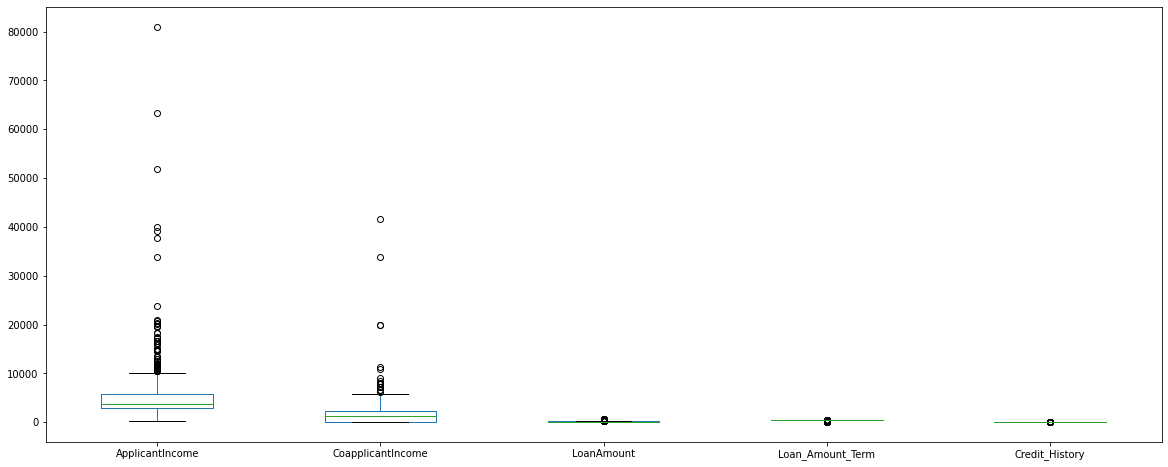

In [11]:
#DETECTING OUTLIERS
# Creating plot
train.plot.box(train,figsize=(20,8))

In [12]:
#iqr to detect outliers 
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1 
((train<(Q1-1.5*IQR))| (train>(Q3+1.5*IQR))).sum()

ApplicantIncome      50
CoapplicantIncome    18
Credit_History       89
Dependents            0
Education             0
Gender                0
LoanAmount           39
Loan_Amount_Term     88
Loan_ID               0
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [13]:
#iqr to detect outliers 
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1 
((test<(Q1-1.5*IQR))| (test>(Q3+1.5*IQR))).sum()

ApplicantIncome      32
CoapplicantIncome     8
Credit_History       59
Dependents            0
Education             0
Gender                0
LoanAmount           18
Loan_Amount_Term     50
Loan_ID               0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


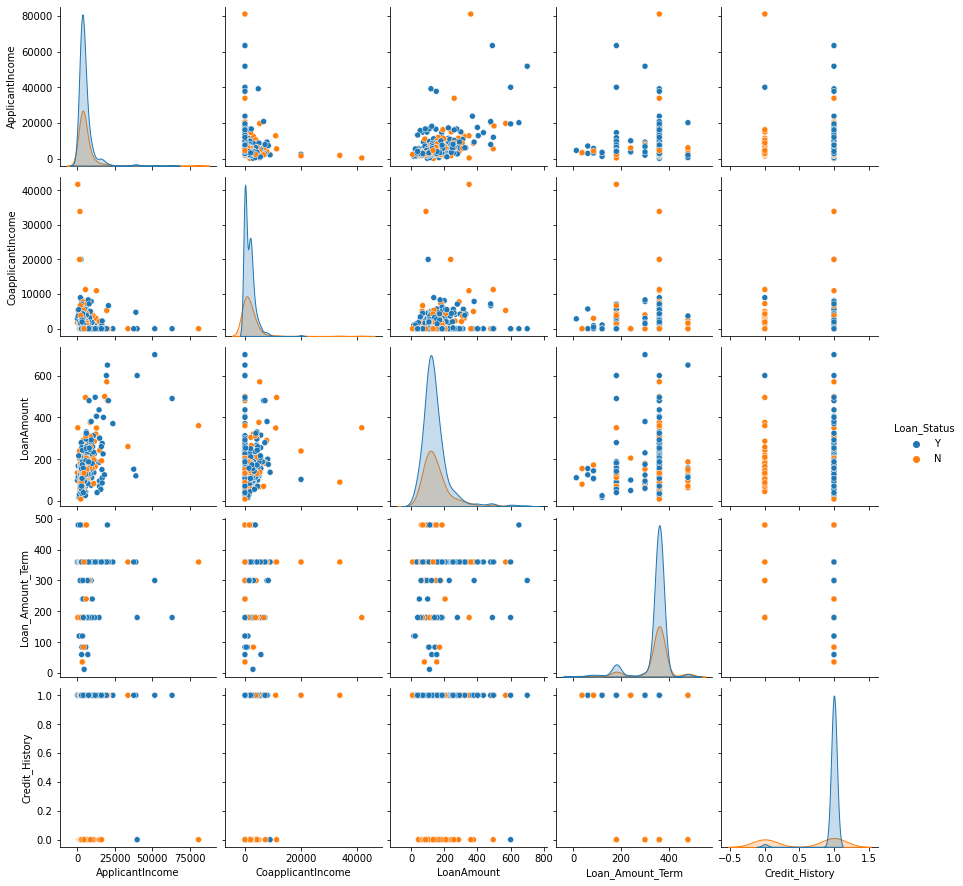

In [14]:
#scatter plot to detect outliers 
sns.pairplot(train,hue='Loan_Status',size=2.5)

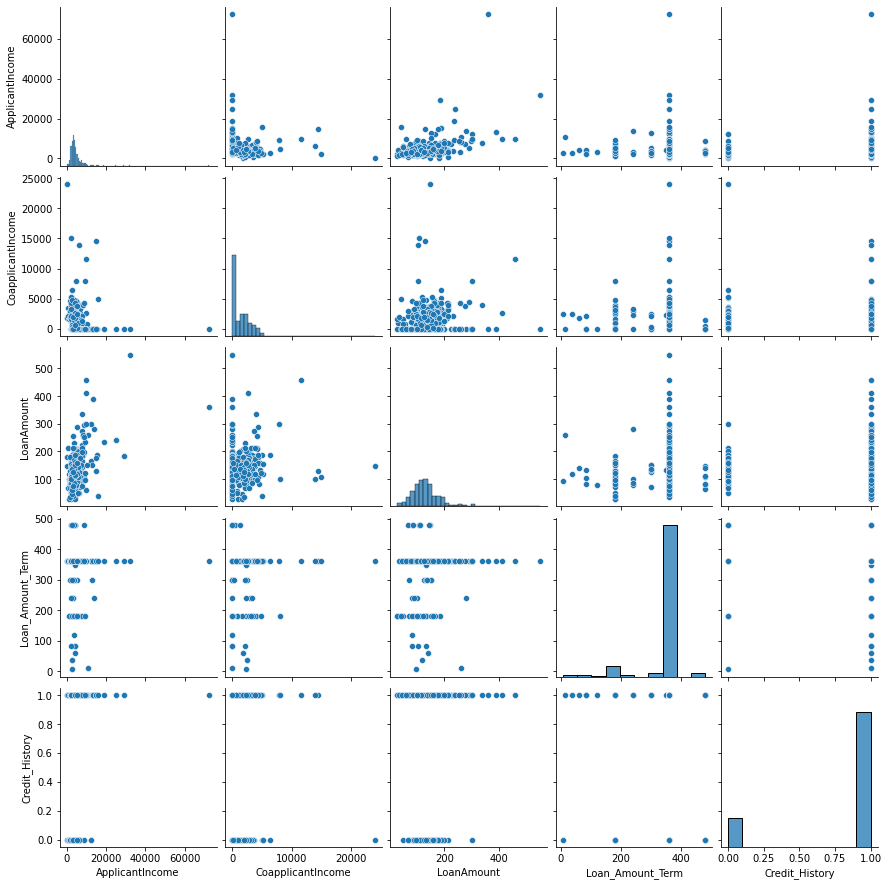

In [15]:
#scatter plot to detect outliers 
sns.pairplot(test)

In [161]:
#deal with null values in train data 
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0] )
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0] )
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0] )
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().median())
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].dropna().median())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().median())

In [146]:
#deal with null values in test data 
test['Gender'] = test['Gender'].fillna(test['Gender'].dropna().mode().values[0] )
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].dropna().mode().values[0] )
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].dropna().mode().values[0] )
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].dropna().median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].dropna().median())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].dropna().median())

In [60]:
#one way to tranform categorical to numeric 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train['Gender'] = labelencoder.fit_transform(train.Gender.values)
train['Married'] = labelencoder.fit_transform(train.Married.values)
train['Education'] = labelencoder.fit_transform(train.Education.values)
train['Self_Employed'] = labelencoder.fit_transform(train.Self_Employed.values)
train['Property_Area'] = labelencoder.fit_transform(train.Property_Area.values)
train['Loan_Status'] = labelencoder.fit_transform(train.Loan_Status.values)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [162]:
#another way to convert categorical variable to numeric 
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
train = train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test = test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


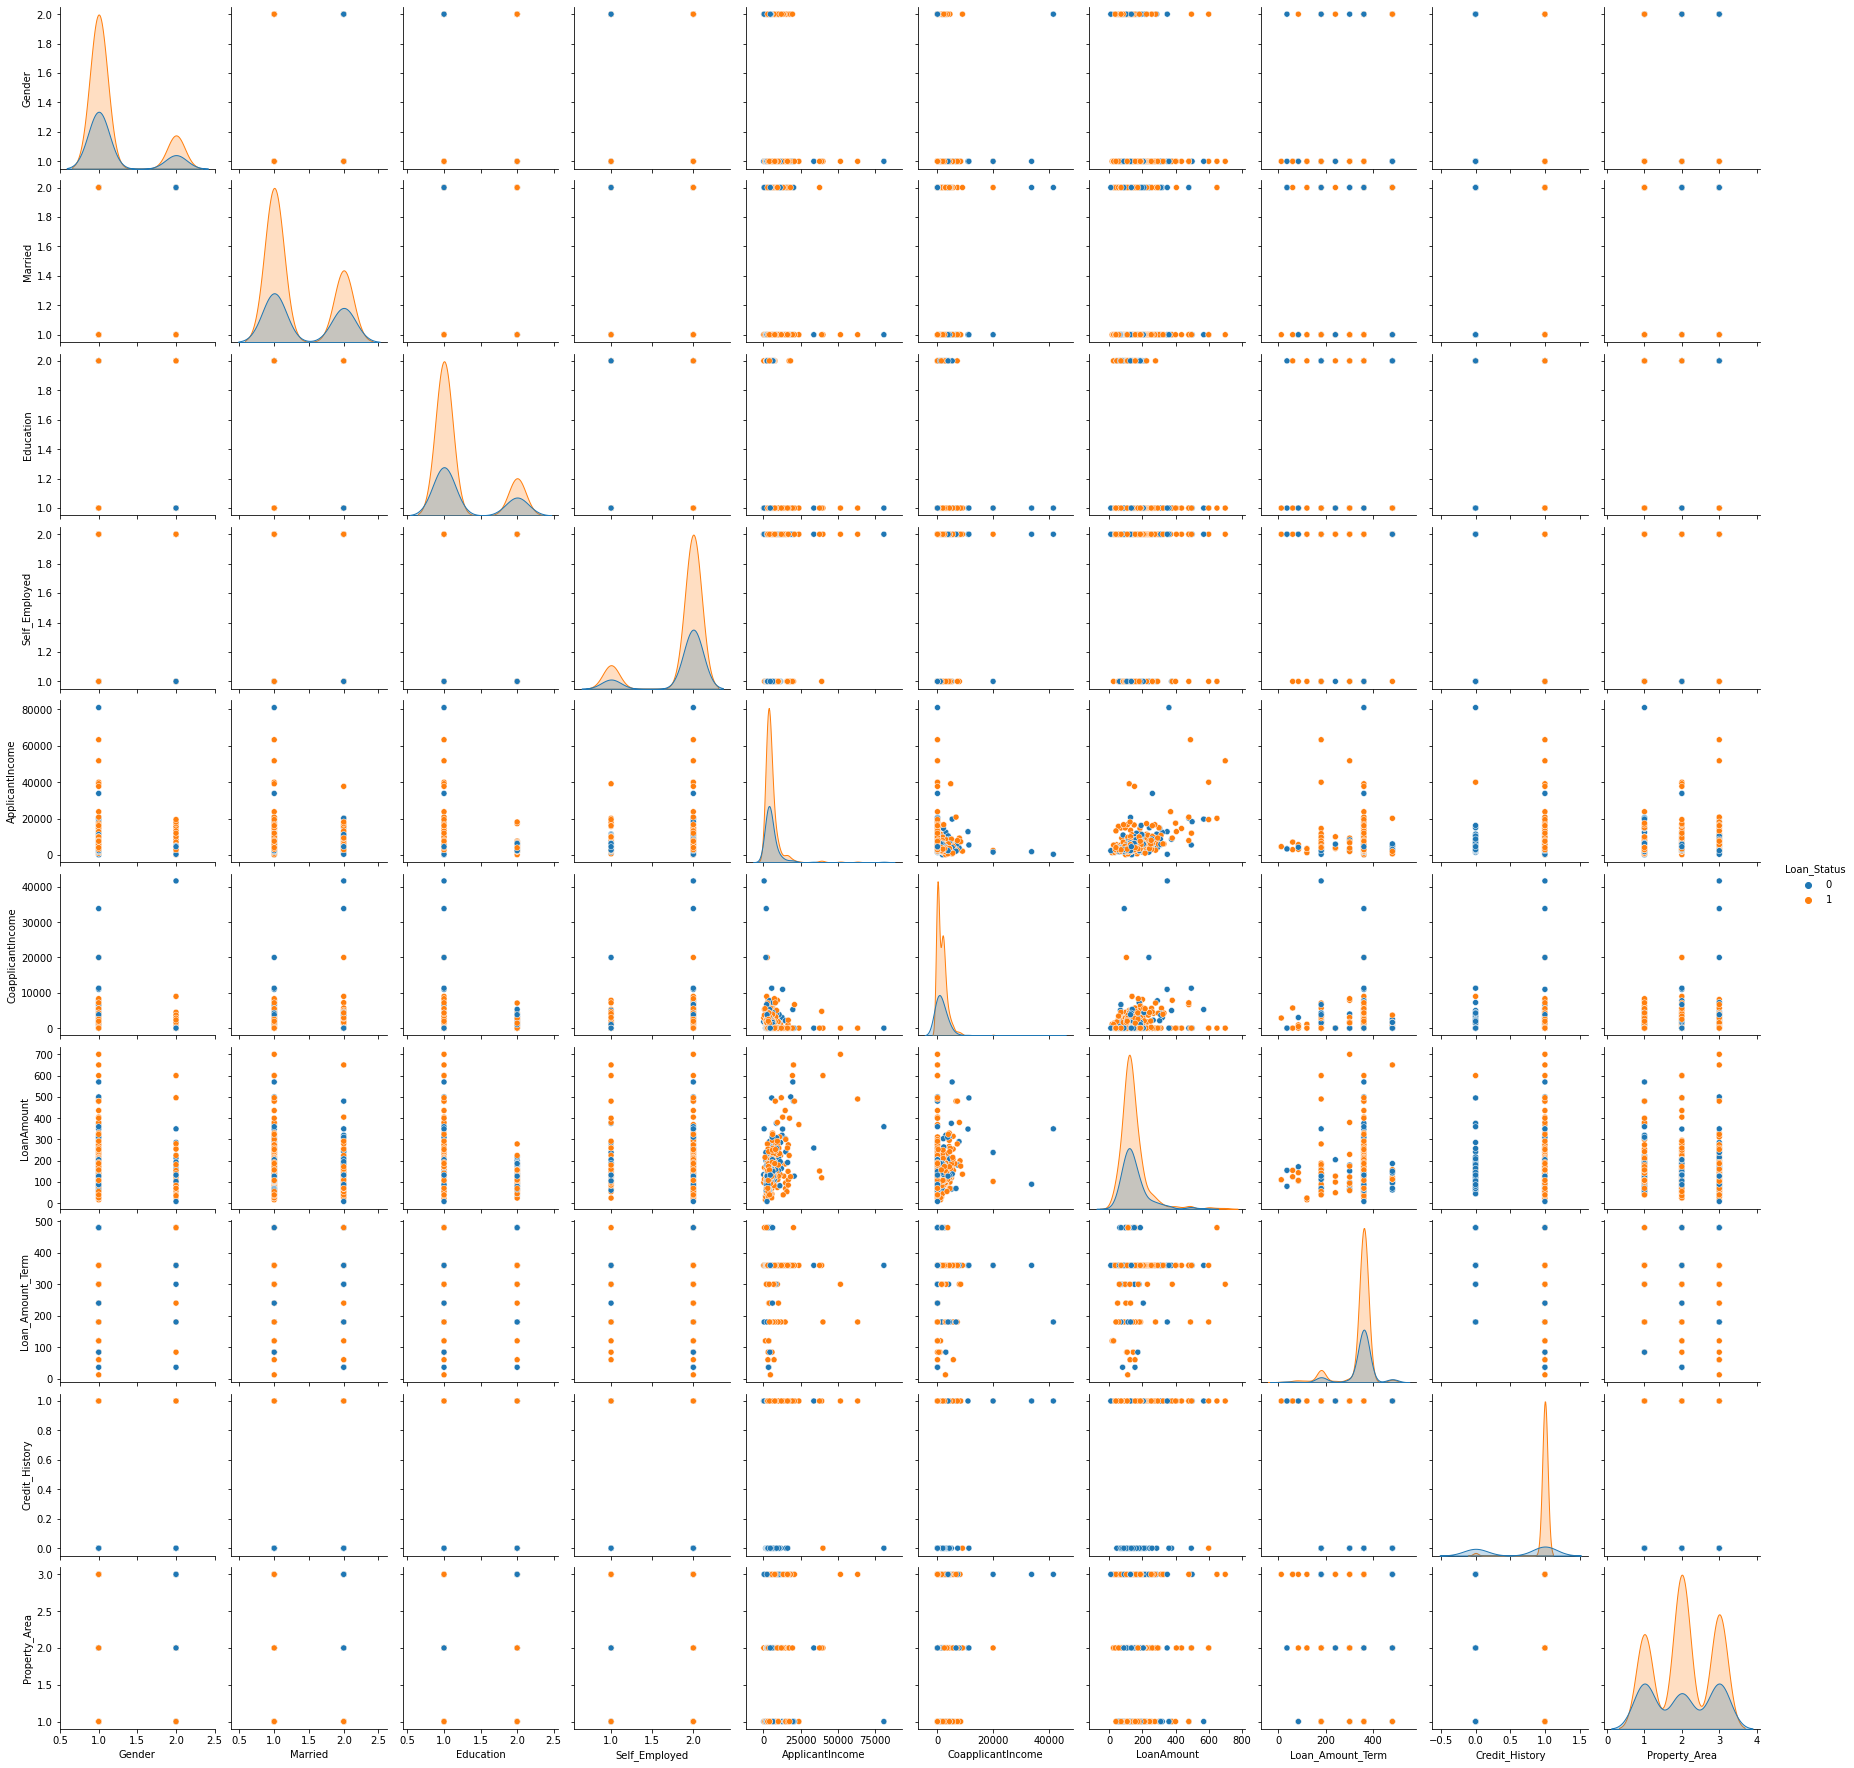

In [74]:
#data visualization
sns.pairplot(train,hue='Loan_Status',size=2.5)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             356 non-null    category
 2   Married            367 non-null    category
 3   Dependents         357 non-null    category
 4   Education          367 non-null    category
 5   Self_Employed      344 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         362 non-null    float64 
 9   Loan_Amount_Term   361 non-null    float64 
 10  Credit_History     338 non-null    float64 
 11  Property_Area      367 non-null    category
dtypes: category(6), float64(3), int64(2), object(1)
memory usage: 20.1+ KB


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,-0.060824,-0.180887,-0.126845,0.084369,-0.009170,0.022563,-0.017987
Married,0.364569,1.000000,-0.012304,0.004489,-0.007584,-0.234475,-0.157284,0.117003,-0.010938,-0.003921,-0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,-0.154968,-0.010432,-0.134975,-0.069206,-0.073658,-0.060887,-0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,-0.161779,0.056237,-0.091853,0.040437,0.001550,0.029232,0.003700
ApplicantIncome,-0.060824,-0.007584,-0.154968,-0.161779,1.000000,-0.230222,0.360876,-0.032269,0.030399,-0.052347,-0.003403
CoapplicantIncome,-0.180887,-0.234475,-0.010432,0.056237,-0.230222,1.000000,0.182825,-0.010630,0.001107,-0.062079,0.030460
LoanAmount,-0.126845,-0.157284,-0.134975,-0.091853,0.360876,0.182825,1.000000,0.029778,0.001586,-0.084478,-0.028066
Loan_Amount_Term,0.084369,0.117003,-0.069206,0.040437,-0.032269,-0.010630,0.029778,1.000000,0.006920,-0.056356,-0.026988
Credit_History,-0.009170,-0.010938,-0.073658,0.001550,0.030399,0.001107,0.001586,0.006920,1.000000,0.001283,0.540556
Property_Area,0.022563,-0.003921,-0.060887,0.029232,-0.052347,-0.062079,-0.084478,-0.056356,0.001283,1.000000,0.028118


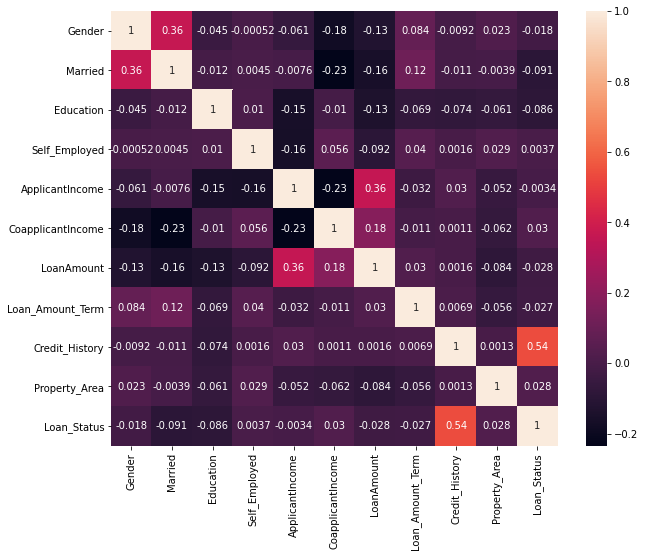

In [75]:
#kendall for correlation
plt.subplots(figsize=(10,8))
sns.heatmap(train.corr(method='kendall'),annot=True)
train.corr(method='kendall')

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.284138,-0.029299,0.074300,-0.075090,-0.122004,-0.094914,0.051205,-0.037465,0.007864
Married,0.284138,1.000000,-0.049443,0.032273,-0.083873,-0.147811,-0.139939,-0.051210,-0.049732,-0.011302
Education,-0.029299,-0.049443,1.000000,0.008729,-0.173033,-0.030048,-0.111162,0.066269,-0.040703,-0.028053
Self_Employed,0.074300,0.032273,0.008729,1.000000,-0.087677,-0.002264,-0.046435,0.039198,-0.097753,0.106044
ApplicantIncome,-0.075090,-0.083873,-0.173033,-0.087677,1.000000,-0.262250,0.282947,0.021678,0.133085,0.003527
CoapplicantIncome,-0.122004,-0.147811,-0.030048,-0.002264,-0.262250,1.000000,0.153606,-0.038681,-0.047934,-0.021802
LoanAmount,-0.094914,-0.139939,-0.111162,-0.046435,0.282947,0.153606,1.000000,0.074345,-0.057603,-0.039152
Loan_Amount_Term,0.051205,-0.051210,0.066269,0.039198,0.021678,-0.038681,0.074345,1.000000,-0.088771,0.027909
Credit_History,-0.037465,-0.049732,-0.040703,-0.097753,0.133085,-0.047934,-0.057603,-0.088771,1.000000,0.061011
Property_Area,0.007864,-0.011302,-0.028053,0.106044,0.003527,-0.021802,-0.039152,0.027909,0.061011,1.000000


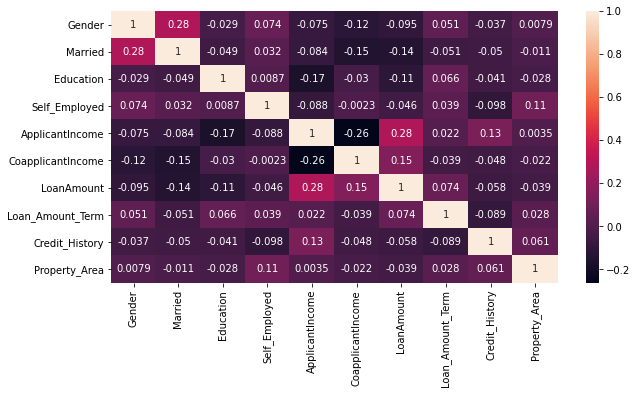

In [76]:
plt.subplots(figsize=(10,5))
sns.heatmap(test.corr(method='kendall'),annot=True)
test.corr(method='kendall')

In [163]:
#SELECT KBEST METHOD FOR FEATURE SELECTION
from sklearn.feature_selection import chi2, SelectKBest, chi2
X = train.drop(['Loan_Status','Loan_ID'],axis=1)
y = train['Loan_Status']
#determine top 8 features 
best = SelectKBest(score_func = chi2,k=8)
fit = best.fit(X,y)
score = pd.DataFrame(fit.scores_)
#assign columns 
col = pd.DataFrame(X.columns)
#concat dataframes
score = pd.concat([col,score],axis=1)
score.columns = ['Attribute','Score']
#print scores in DESC order
print(score.nlargest(8,'Score'))

            Attribute         Score
6   CoapplicantIncome  11342.041603
5     ApplicantIncome     93.904964
7          LoanAmount     32.821655
9      Credit_History     26.005877
8    Loan_Amount_Term      3.778554
1             Married      0.864271
3           Education      0.634261
10      Property_Area      0.192392


[0.02130646 0.01856454 0.05321791 0.02234643 0.02195652 0.18578441
 0.11617753 0.18280777 0.04728132 0.27977828 0.05077882]


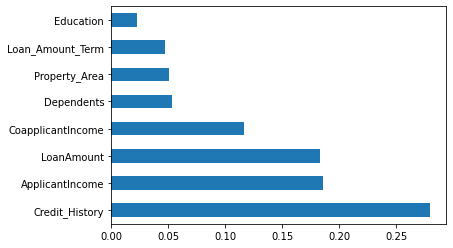

In [164]:
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
imp = pd.Series(model.feature_importances_,index= X.columns)
imp.nlargest(8).plot(kind='barh')
plt.show()

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


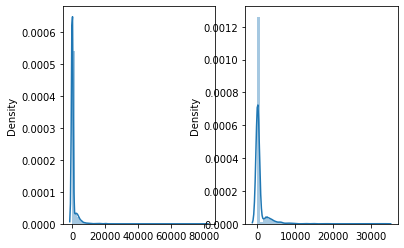

In [101]:
#to identify distribution of data 
fig, axs = plt.subplots(ncols=2)
sns.distplot(X_train,ax=axs[0])
sns.distplot(X_test,ax=axs[1])

In [168]:
#fit the model 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,criterion="entropy")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [169]:
#evaluation metrics 
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.8749999999999999


In [170]:
#fit the model on testing data 
test_df = test.drop(['Loan_ID'],axis=1)
y_pred1 = model.predict(test_df)

In [171]:
#get the sample.csv file 
sub = pd.read_csv('sample_submission_49d68Cx.csv')
sub['Loan_Status'] = y_pred1
sub['Loan_ID'] = test['Loan_ID']
sub['Loan_Status'].replace(0,'N',inplace=True)
sub['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(sub,columns=['Loan_ID','Loan_Status']).to_csv('sample.csv')